In [1]:
! pip install torchxrayvision

In [2]:
import torchxrayvision as xrv
import skimage, torch, torchvision

## load datasat

In [114]:
%load_ext autoreload
%autoreload 2
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(224)])

In [4]:
d_nih = xrv.datasets.NIH_Dataset(imgpath="/Users/jiashuoli/Desktop/thesis/NIH/images-224",
                                 views=["PA","AP"], unique_patients=False)

In [5]:
d_nih

{'Atelectasis': {0.0: 100561, 1.0: 11559},
 'Cardiomegaly': {0.0: 109344, 1.0: 2776},
 'Consolidation': {0.0: 107453, 1.0: 4667},
 'Edema': {0.0: 109817, 1.0: 2303},
 'Effusion': {0.0: 98803, 1.0: 13317},
 'Emphysema': {0.0: 109604, 1.0: 2516},
 'Fibrosis': {0.0: 110434, 1.0: 1686},
 'Hernia': {0.0: 111893, 1.0: 227},
 'Infiltration': {0.0: 92226, 1.0: 19894},
 'Mass': {0.0: 106338, 1.0: 5782},
 'Nodule': {0.0: 105789, 1.0: 6331},
 'Pleural_Thickening': {0.0: 108735, 1.0: 3385},
 'Pneumonia': {0.0: 110689, 1.0: 1431},
 'Pneumothorax': {0.0: 106818, 1.0: 5302}}


NIH_Dataset num_samples=112120 views=['PA', 'AP'] data_aug=None

In [6]:
d_nih.csv.iloc[0]

index                                         0
Image Index                    00000001_000.png
Finding Labels                     Cardiomegaly
Follow-up #                                   0
Patient ID                                    1
Patient Age                                  57
Patient Gender                                M
View Position                                PA
OriginalImage[Width                        2682
Height]                                    2749
OriginalImagePixelSpacing[x               0.143
y]                                        0.143
view                                         PA
has_masks                                 False
patientid                                     1
age_years                                  57.0
sex_male                                   True
sex_female                                False
Name: 0, dtype: object

{'Atelectasis': 0.0,
 'Cardiomegaly': 1.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

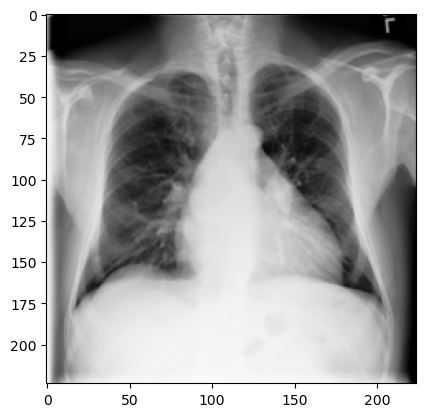

In [7]:
sample = d_nih[0]
plt.imshow(sample["img"][0], cmap="Greys_r")
dict(zip(d_nih.pathologies,sample["lab"]))

In [8]:
print(sample)

{'idx': 0, 'lab': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'img': array([[[  518.02356 ,   469.83533 ,   325.27063 , ...,  -983.84314 ,
          -983.84314 ,  -991.8745  ],
        [  445.7412  ,   309.2079  ,   -60.23529 , ...,  -983.84314 ,
          -983.84314 ,  -991.8745  ],
        [  301.1765  ,   -44.172546,  -542.1177  , ...,  -991.8745  ,
          -983.84314 ,  -991.8745  ],
        ...,
        [  999.9059  ,   815.1843  ,   461.80396 , ..., -1007.93726 ,
         -1024.      , -1024.      ],
        [  999.9059  ,   823.2157  ,   461.80396 , ...,  -983.84314 ,
         -1024.      , -1024.      ],
        [ 1007.93726 ,   831.2471  ,   461.80396 , ...,  -927.62354 ,
         -1024.      , -1024.      ]]], dtype=float32)}


In [9]:
model = xrv.models.DenseNet(weights="densenet121-res224-all")

(224, 224)
Setting XRayResizer engine to cv2 could increase performance.


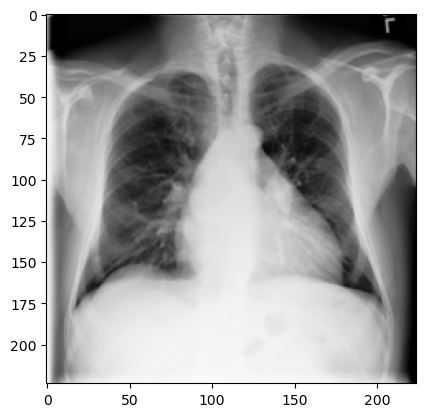

In [130]:
# Prepare the image:
img = skimage.io.imread("/Users/jiashuoli/Desktop/thesis/NIH/images-224/00000001_000.png",as_gray=True)
img = xrv.datasets.normalize(img, 255) # convert 8-bit image to [-1024, 1024] range
print(img.shape)
plt.imshow(img, cmap="Greys_r")
transform = torchvision.transforms.Compose([xrv.datasets.XRayResizer(224)])

img_transform = transform(img)
img_torch = torch.from_numpy(img_transform)

In [131]:
model = xrv.models.DenseNet(weights="densenet121-res224-all")
outputs = model(img_torch.unsqueeze(0)) # or model.features(img[None,...]) 

In [132]:
outputs

tensor([[0.5749, 0.5291, 0.5183, 0.5172, 0.5156, 0.5160, 0.5145, 0.5911, 0.5985,
         0.5566, 0.5315, 0.5113, 0.5424, 0.1857, 0.0809, 0.5041, 0.6841, 0.5729]],
       grad_fn=<IndexPutBackward0>)

In [ ]:

!pip install torchvision matplotlib

In [ ]:
!pip install torchcam

In [67]:
%matplotlib inline
# All imports
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import softmax, interpolate
from torchvision.io.image import read_image
from torchvision.models import resnet18
from torchvision.transforms.functional import normalize, resize, to_pil_image
import torch.nn as nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from torchcam.methods import SmoothGradCAMpp, LayerCAM
from torchcam.utils import overlay_mask

In [76]:
model.eval()


XRV-DenseNet121-densenet121-res224-all

In [17]:
model

XRV-DenseNet121-densenet121-res224-all

In [18]:
model.features

Sequential(
  (conv0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace=True)
  (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(96, 128, ke

In [133]:
cam_extractor = LayerCAM(model = model,target_layer=model.features.conv0,input_shape=(1,224,224))

In [134]:
outputs = model(img_torch.unsqueeze(0)) # or model.features(img[None,...]) 

In [139]:

# Retrieve the CAM by passing the class index and the model output
cams = cam_extractor(outputs.squeeze(0).argmax().item(), outputs)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

torch.Size([1, 112, 112])


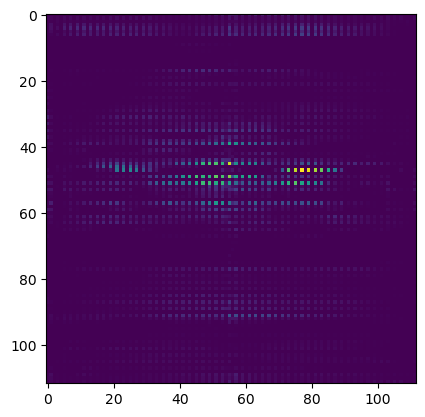

In [140]:

# Notice that there is one CAM per target layer (here only 1)
for cam in cams:
  print(cam.shape)
  plt.imshow(cam[0])
  # # Resize the CAM to the same size as the grayscale image
  # cam_resized = resize(cam.squeeze(), img.shape, anti_aliasing=True)

  # # Normalize the CAM to the range [0, 1]
  # cam_norm = (cam_resized - np.min(cam_resized)) / (np.max(cam_resized) - np.min(cam_resized))

  # # Apply a color map to the normalized CAM to generate a heatmap
  # heatmap = plt.cm.jet(cam_norm)

  # # Overlay the heatmap on top of the grayscale image
  # blended = 0.5 * heatmap[:, :, :3] + 0.5 * np.expand_dims(img, axis=2)

  # # Display the resulting heatmap
  # plt.imshow(blended)
  # plt.axis('off')
  # plt.show()

In [141]:
cam_resized = resize(cam.squeeze(), (224, 224), anti_aliasing=True)
print(cam_resized.shape)

(224, 224)


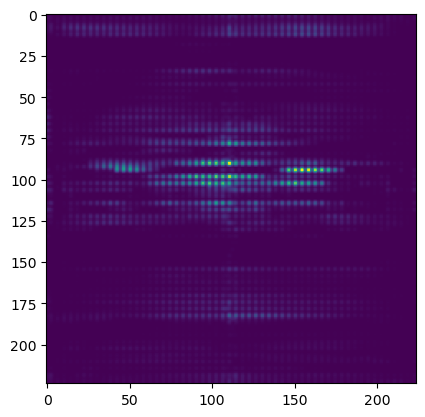

In [142]:
plt.imshow(cam_resized)

In [151]:
# 读取png图片
img1 = Image.open("/Users/jiashuoli/Desktop/thesis/NIH/images-224/00000001_000.png")

# 将Pillow对象转换为numpy.ndarray
img_array = np.array(img1)

# 创建一个空的RGB三通道数组
img_rgb1 = np.zeros((*img_array.shape, 3), dtype=np.uint8)

# 将灰度图复制到RGB三个通道中
for i in range(3):
    img_rgb1[..., i] = img_array

# 打印转换后的图片形状
print(img_rgb1.shape)

(224, 224, 3)


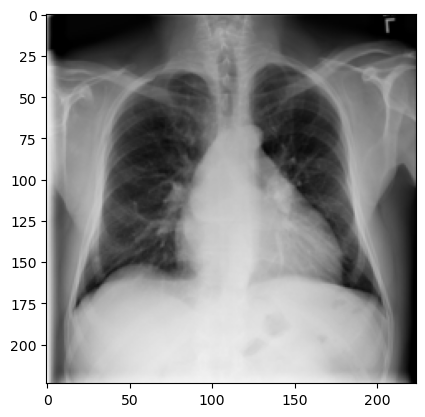

In [152]:
plt.imshow(img_rgb1)

In [149]:
# 将cam的颜色映射为半透明的RGBA格式
cam_rgba = np.dstack((cam, np.zeros_like(cam))) # 创建一个 (112, 112, 2) 的数组
cam_rgba = np.concatenate((cam_rgba, np.ones_like(cam).reshape(cam.shape[0], cam.shape[1], 1)), axis=2) # 创建一个 (112, 112, 4) 的数组
cam_rgba[:, :, :3] *= 255 # 将 RGB 通道值缩放到 0-255 范围内
cam_rgba = cam_rgba.astype(np.uint8) # 转换为 uint8 类型

# 创建一个新的figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# 显示灰度图
ax.imshow(img, cmap='gray')

# 在灰度图上面绘制彩色标注
x, y = np.meshgrid(np.arange(cam.shape[1]), np.arange(cam.shape[0]))
ax.imshow(cam_rgba, extent=(0, img.shape[1], img.shape[0], 0), interpolation='bilinear')

# 隐藏坐标轴
ax.set_xticks([])
ax.set_yticks([])

# 显示图像
plt.show()

ValueError: cannot reshape array of size 12544 into shape (1,112,1)

TypeError: Invalid shape (224, 224, 112) for image data

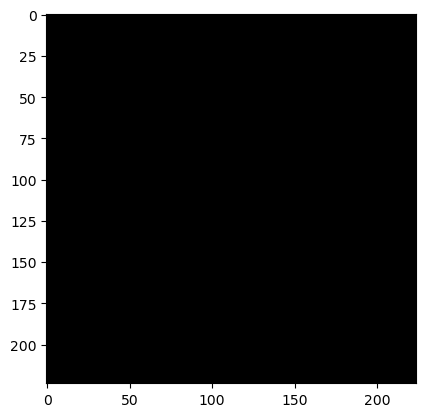

In [146]:
# 将灰度图像转换为RGB图像，并将颜色映射为灰度
def gray2rgb(img):
    h, w = img.shape
    rgb = np.zeros((h, w, 3), dtype=np.float32)
    rgb[:, :, 0] = img
    rgb[:, :, 1] = img
    rgb[:, :, 2] = img
    return rgb

# 将灰度图像缩放为指定大小
def resize(img, size):
    from skimage.transform import resize
    return resize(img, size, mode='reflect', anti_aliasing=True)

# 对灰度图像进行对数变换以增加对比度
def log_transform(img):
    img_log = np.log(img + 1)
    img_log = (img_log - np.min(img_log)) / (np.max(img_log) - np.min(img_log))
    return img_log

# 转换图像并进行对数变换
img_log = log_transform(img)
img_rgb = gray2rgb(img_log)
cam_resized = resize(cam, img.shape)

# 创建一个新的图像
fig, ax = plt.subplots()
ax.imshow(img_rgb)

# 绘制heatmap
heatmap = ax.imshow(cam_resized, alpha=0.5, cmap='jet')
plt.colorbar(heatmap)

# 显示图像
plt.show()








In [124]:
def gray_to_rgb(img_gray):
    img_rgb = np.zeros((img_gray.shape[0], img_gray.shape[1], 3), dtype=np.uint8)
    img_rgb[:,:,0] = img_gray/3
    img_rgb[:,:,1] = img_gray/3
    img_rgb[:,:,2] = img_gray/3
    img_rgb=xrv.datasets.normalize(img, 255) # convert 8-bit image to [-1024, 1024] range
    return img_rgb

In [125]:
# img_rgb = gray_to_rgb(img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

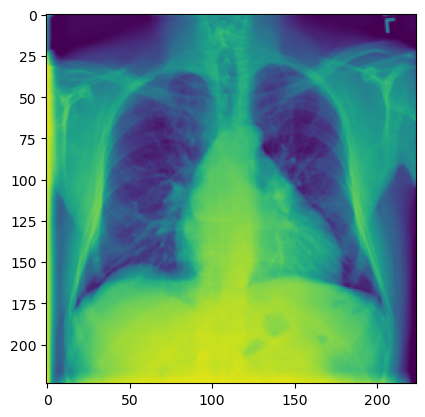

In [126]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


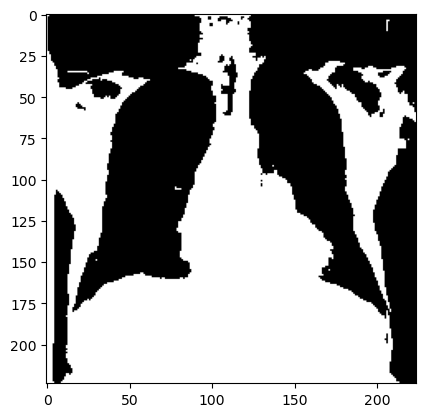

In [127]:
plt.imshow(img_rgb)

In [118]:
print(img_rgb.shape)

(224, 224, 3)


In [119]:

# Overlayed on the image
for name, cam in zip(cam_extractor.target_names, cams):
  result = overlay_mask(to_pil_image(img_rgb), to_pil_image(cam.squeeze(0), mode='F'), alpha=0.5)
  plt.imshow(result); plt.axis('off'); plt.title(name); plt.show()

TypeError: Input type float32 is not supported

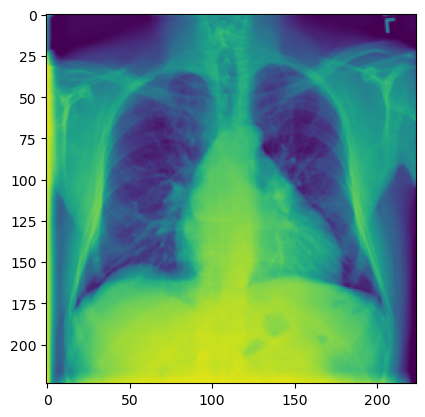

In [98]:
tmp = np.stack(img * 3, axis=-1)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


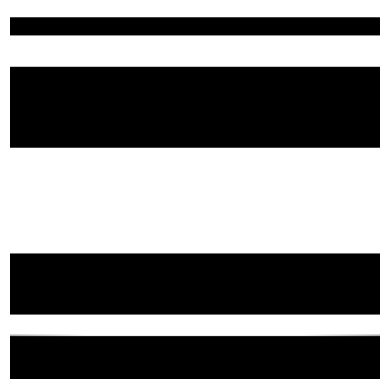

In [69]:
for name, cam in zip(cam_extractor.target_names, cams):
    # resize the CAM to the same size as the grayscale image
    cam_resized = resize(cam.squeeze(), (224, 224), anti_aliasing=True)
    # normalize the CAM to the range [0, 1]
    cam_norm = (cam_resized - np.min(cam_resized)) / (np.max(cam_resized) - np.min(cam_resized))

    # convert the grayscale image to an RGB image
    img_rgb = np.stack(img * 3, axis=-1)

    # blend the grayscale image and the CAM
    blended = plt.imshow(img_rgb)
    #blended.set_data(cam_norm*img_rgb)
    plt.axis('off')
    plt.show()
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# resize the CAM to the same size as the grayscale image
cam_resized = resize(cam.squeeze(), (224, 224), anti_aliasing=True)

# normalize the CAM to the range [0, 1]
cam_norm = (cam_resized - np.min(cam_resized)) / (np.max(cam_resized) - np.min(cam_resized))

# convert the grayscale image to an RGB image
img_rgb = np.stack((img.squeeze(),) * 3, axis=-1)

# blend the grayscale image and the CAM
blended = plt.imshow(img_rgb)
blended.set_data(cam_norm*img_rgb)
plt.axis('off')
plt.show()

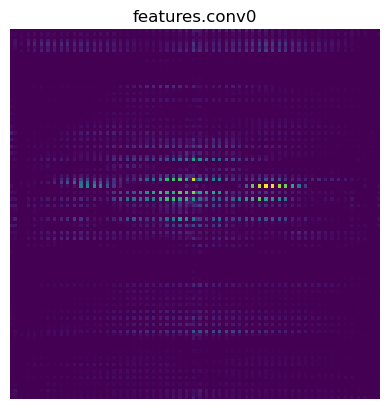

In [44]:

# The raw CAM
for name, cam in zip(cam_extractor.target_names, cams):
  plt.imshow(cam.squeeze(0).numpy()); plt.axis('off'); plt.title(name); plt.show()

In [58]:
rgb_tensor = torch.zeros(1, 224, 224, 3)

rgb_tensor[..., 0] = img
rgb_tensor[..., 1] = img
rgb_tensor[..., 2] = img

In [59]:
print(rgb_tensor.size())

torch.Size([1, 224, 224, 3])


In [64]:
rgb_tensor = rgb_tensor.squeeze(0).permute(1,2,0)

In [65]:
print(rgb_tensor.size())

torch.Size([3, 224, 224])


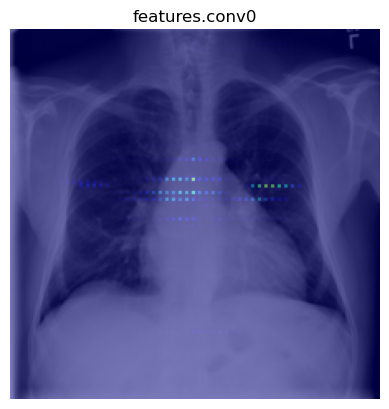

In [158]:

# Overlayed on the image
for name, cam in zip(cam_extractor.target_names, cams):
  result = overlay_mask(to_pil_image(img_rgb1), to_pil_image(cam.squeeze(0), mode='F'), alpha=0.5)
  plt.imshow(result); plt.axis('off'); plt.title(name); plt.show()

In [34]:
print(img.size())

torch.Size([1, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


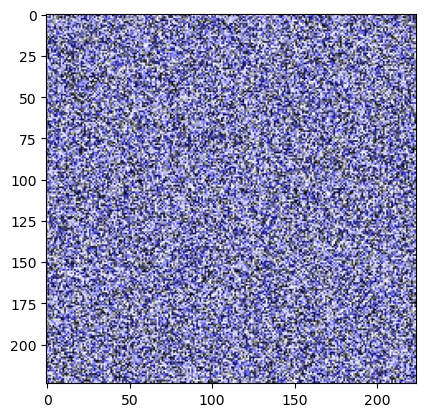

In [129]:
import matplotlib.pyplot as plt

# 创建一个224x224的随机灰度图像
img = np.random.rand(224, 224)

# 创建一个112x112的随机灰度图像，表示CAM
cam = np.random.rand(112, 112)

# 将CAM缩放到与img相同的大小
cam = np.kron(cam, np.ones((2,2)))

# 将img和CAM叠加在一起，并将CAM的不透明度设置为0.5
heatmap = np.zeros((224, 224, 3), dtype=np.float32)
heatmap[:,:,0] = img
heatmap[:,:,1] = img
heatmap[:,:,2] = img + cam * 0.5

# 显示叠加后的图像，将灰度值映射到热力图颜色映射中
plt.imshow(heatmap, cmap='jet')
plt.show()